## SMOTE

SMOTE (Synthetic Minority Oversampling Technique) is a technique used in machine learning to address the problem of imbalanced datasets. In many real-world scenarios, the dataset may contain a disproportionate number of instances belonging to one class (the majority class) compared to another class (the minority class). This can negatively impact the performance of a machine learning model, as the model may be biased towards the majority class and may not perform well on the minority class.

SMOTE is an oversampling technique that generates synthetic data for the minority class by interpolating new examples between existing ones. The basic idea is to identify minority class examples that are close to each other and then generate new synthetic examples along the line segments connecting them. This can help to balance the class distribution and improve the performance of a machine learning model on the minority class.

The SMOTE algorithm works by randomly selecting an instance from the minority class and then selecting one of its k-nearest neighbors. A new instance is then synthesized by interpolating between the two instances in feature space, based on a random number between 0 and 1. This process is repeated until the minority class is oversampled to the desired level.

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [4]:
import pandas as pd

In [6]:
df1 = pd.DataFrame(x, columns = ['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
Final_df = pd.concat([df1,df2],axis = 1)

In [7]:
Final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [8]:
Final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [9]:
import matplotlib.pyplot as plt

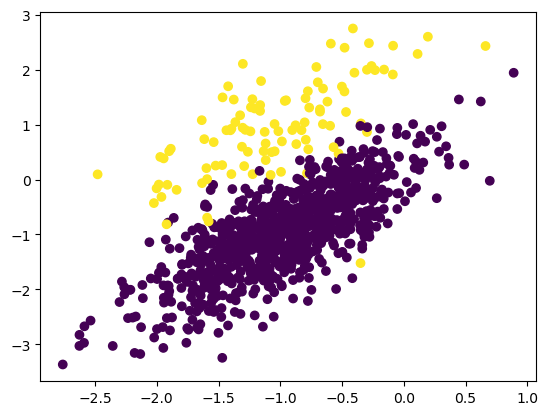

In [10]:
plt.scatter(Final_df['f1'],Final_df['f2'],c = Final_df['target'])

In [11]:
!pip install imblearn

     ------------------------------------ 226.0/226.0 kB 918.1 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [12]:
from imblearn.over_sampling import SMOTE

In [14]:
oversample = SMOTE()
x,y = oversample.fit_resample(Final_df[['f1','f2']],Final_df['target'])

In [16]:
x.shape

(1800, 2)

In [17]:
y.shape

(1800,)

In [20]:
len(y[y==0])

900

In [21]:
df1 = pd.DataFrame(x, columns = ['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2], axis = 1)

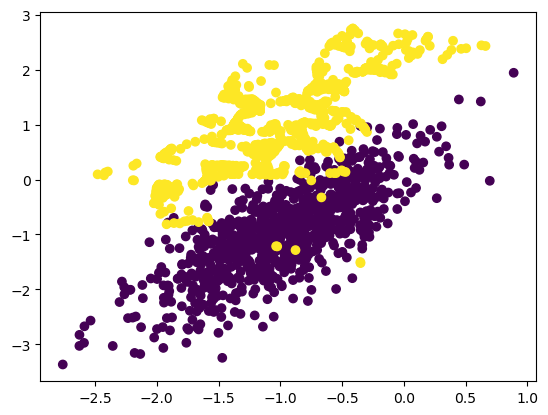

In [23]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['target'])